In [9]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import *

## 对 Iris 数据集进行主成分分析

In [11]:
iris = sk.datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


使用 Python 实现主成分分析：

In [12]:
import numpy as np

def pca_transform(x, n_components=None):
    x = np.array(x, copy=True)

    # 求协方差矩阵
    cov = np.cov(x, rowvar=False)

    # 对协方差矩阵进行特征分解，并按特征值大小降序排列
    eigen_values, eigen_vectors = np.linalg.eigh(cov)
    idx = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    print(eigen_values)
    print(eigen_vectors)

    # 保留前n个特征向量
    if n_components is not None:
        eigen_vectors = eigen_vectors[:, :n_components]

    # 计算主成分
    x = x - x.mean(axis=0)
    x = np.dot(eigen_vectors.T, x.T).T
    
    return x

pca_transform(df)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]


array([[ 2.68412563e+00,  3.19397247e-01,  2.79148276e-02,
         2.26243707e-03],
       [ 2.71414169e+00, -1.77001225e-01,  2.10464272e-01,
         9.90265503e-02],
       [ 2.88899057e+00, -1.44949426e-01, -1.79002563e-02,
         1.99683897e-02],
       [ 2.74534286e+00, -3.18298979e-01, -3.15593736e-02,
        -7.55758166e-02],
       [ 2.72871654e+00,  3.26754513e-01, -9.00792406e-02,
        -6.12585926e-02],
       [ 2.28085963e+00,  7.41330449e-01, -1.68677658e-01,
        -2.42008576e-02],
       [ 2.82053775e+00, -8.94613845e-02, -2.57892158e-01,
        -4.81431065e-02],
       [ 2.62614497e+00,  1.63384960e-01,  2.18793179e-02,
        -4.52978706e-02],
       [ 2.88638273e+00, -5.78311754e-01, -2.07595703e-02,
        -2.67447358e-02],
       [ 2.67275580e+00, -1.13774246e-01,  1.97632725e-01,
        -5.62954013e-02],
       [ 2.50694709e+00,  6.45068899e-01,  7.53180094e-02,
        -1.50199245e-02],
       [ 2.61275523e+00,  1.47299392e-02, -1.02150260e-01,
      

In [4]:
sk_pca = sk.decomposition.PCA().fit(df)
print(sk_pca.explained_variance_)
print(sk_pca.components_)
sk_pca.transform(df)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

使用上述实现对 Iris 数据集进行主成分分析：

In [5]:
import pandas as pd
import sklearn as sk
from sklearn import *

# 加载 Iris 数据集
iris = sk.datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print('原始数据集：')
display(df.head())

# 对 Iris 数据集进行主成分分析
df_pca = pd.DataFrame(pca_transform(df))
print('PCA 结果：')
display(df_pca.head())

# 计算方差贡献率
print('方差贡献率：')
df_pca.var() / df.var().sum()

原始数据集：


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


PCA 结果：


,0,1,2,3
0,2.684126,0.319397,0.027915,0.002262
1,2.714142,-0.177001,0.210464,0.099027
2,2.888991,-0.144949,-0.017900,0.019968
3,2.745343,-0.318299,-0.031559,-0.075576
4,2.728717,0.326755,-0.090079,-0.061259


方差贡献率：


0    0.924619
1    0.053066
2    0.017103
3    0.005212
dtype: float64

前两个主成分的累积方差贡献率达到了 $97.77\%$，保留了原数据集绝大部分的信息量。我们可以忽略其余主成分，以前两个主成分为坐标轴绘制散点图：

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

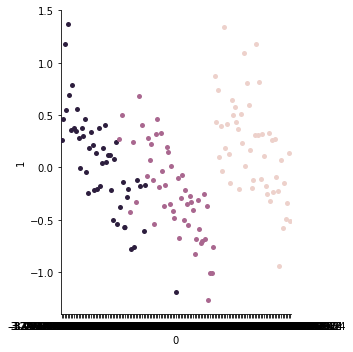

In [6]:
import seaborn as sns

sns.catplot(data=df_pca, x=0, y=1, hue=iris.target, kind='strip')

可以看到，三种鸢尾花的样本点被相对较好地分开了。

为了对比 PCA 前后的数据分布，我们还可以以每对特征为坐标轴，绘制原始数据集的一组散点图：

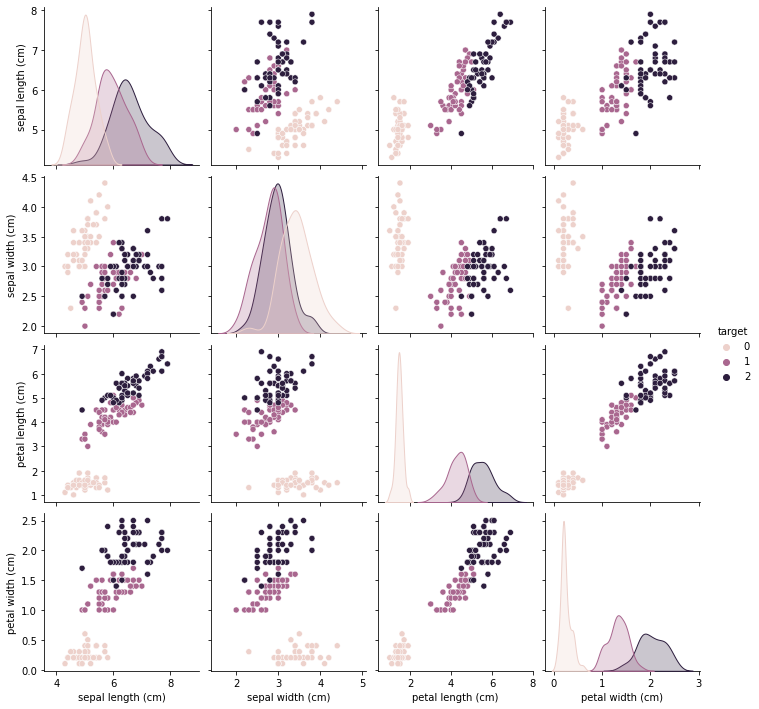

In [7]:
df['target'] = iris.target
sns.pairplot(df, hue='target')

以及 PCA 结果的一组散点图：

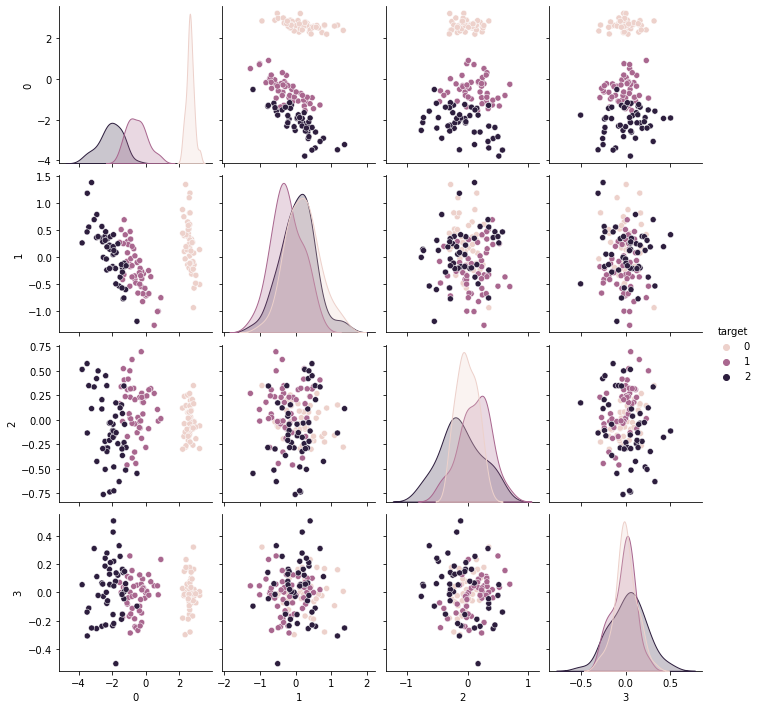

In [8]:
df_pca['target'] = iris.target
sns.pairplot(data=df_pca, hue='target')

可以看到，在原始数据集中，petal length 和 petal width 能较好地区分开三种鸢尾花；而在 PCA 结果中，大部分信息都被转移到了第一个主成分中，其余三个主成分对于区分鸢尾花帮助不大，与前述的方差贡献率相吻合。在经过 PCA 处理后，我们只需要第一个主成分就能在几乎不改变预测精度的情况下完成分类，这不仅降低了设计分类模型的难度，还提升了模型的训练性能和处理性能，一举三得。